In [324]:
#importing libraries for Webscraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

Note:both excel file and notebook file need to be in same location in pc 

In [325]:
#reading the excel file which contain URLs

input_df=pd.read_excel('input.xlsx')

In [326]:
input_df.tail()

,URL_ID,URL
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...
99,blackassign0100,https://insights.blackcoffer.com/how-will-covi...


After going through HTML structures of various pages in the list it was observed that there are 2 types of html structures with different class names, the webscraping examples of both pages is shown below  

In [327]:
#webscraping example of type 1 page 

def scraping(url):
    page1=requests.get(url)
    soup=BeautifulSoup(page1.text,'html.parser')
    title=soup.find('h1').get_text().strip()
    article_text=soup.find('div',class_='td-post-content tagdiv-type').get_text().strip()
    text={'title': title, 'article_text': article_text}
    return text

In [328]:
#testing for blackassign001

url='https://insights.blackcoffer.com/rising-it-cities-and-its-impact-on-the-economy-environment-infrastructure-and-city-life-by-the-year-2040-2/'
print(scraping(url))

{'title': 'Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040.', 'article_text': 'We have seen a huge development and dependence of people on technology in recent years. We have also seen the development of AI and ChatGPT in recent years. So it is a normal thing that we will become fully dependent on technology by 2040. Information technology will be a major power for all the developing nations. As a member of a developing nation, India is rapidly growing its IT base. It has also grown some IT cities which will be the major control centres for Information technology by 2040.\nRising IT cities\n\nNoida:- Noida in Uttar Pradesh near New Delhi is an emerging IT sector now. Many large companies like Google, Microsoft, IBM, Infosys and others have set up their companies here. Noida has a market base of billions of dollars and is doing a great job of boosting the national economy. The establishment of so many software companies has mad

In [329]:
#webscraping example of type 2 page

def scraping2(url):
    page2=requests.get(url)
    soup=BeautifulSoup(page2.text,'html.parser')
    title=soup.find('h1').get_text().strip()
    article_text=soup.find('div',class_='td_block_wrap tdb_single_content tdi_130 td-pb-border-top td_block_template_1 td-post-content tagdiv-type').get_text().strip()
    article_text = article_text.replace('\n', '')
    text={'title': title, 'article_text': article_text}
    return text

In [330]:
#testing for blackassign0100

url='https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-2/'
len(scraping2(url)['article_text'])

6703

In [331]:
#empty list to store all the scraped data

extracted_texts=[]

In [332]:
#function to scrape all the web articles 

def web_scraping(url):
    try:
        page=requests.get(url)
        soup=BeautifulSoup(page.text,'html.parser')
        title=soup.find('h1').get_text().strip()
        article_text=soup.find('div',class_='td-post-content tagdiv-type')
        if article_text:
            article_text=article_text.get_text().strip()
        else:
            article_text = soup.find('div', class_='td_block_wrap tdb_single_content tdi_130 td-pb-border-top td_block_template_1 td-post-content tagdiv-type').get_text().strip()
        article_text = article_text.replace('\n', ' ')
        text=title+article_text
        return text
    
#code to show error if there is an error scraping 

    except Exception:
        print('Error from '+url+' -This Article has been removed' )
        return None

In [333]:
#calling the function and iterating each row of input dataframe
for index,row in input_df.iterrows():
    url_id=row['URL_ID']
    url=row['URL']
    text=web_scraping(url)
    
#adding scraped data to the empty list and creating a dataframe
    
    if text:
        extracted_texts.append({'URL_ID': url_id,'URL':url, 'Text': text})
text_df=pd.DataFrame(extracted_texts)

Error from https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/ -This Article has been removed
Error from https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/ -This Article has been removed


In [334]:
#checking length of raw text
text_df['Text_length']=text_df['Text'].apply(lambda x :len(x))

In [335]:
df=text_df.copy()

In [336]:
text_df

,URL_ID,URL,Text,Text_length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,7088
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,9798
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",7836
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,7568
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,4621
...,...,...,...,...
93,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,7177
94,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,6348
95,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,2665
96,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,3624


In [337]:
#removing the author info at the end of the article
trailing_sentence = 'Blackcoffer Insights'
# Function to remove the trailing sentence
def remove_trailing_sentence(text):
    # Find the index of the trailing sentence
    trailing_index = text.find(trailing_sentence)
    if trailing_index != -1:
        return text[:trailing_index].strip()
    else:
        return text

# Applying the function to remove the author info
text_df['text'] = text_df['Text'].apply(remove_trailing_sentence)
text_df['text_length']=text_df['text'].apply(lambda x :len(x))

In [338]:
text_df

,URL_ID,URL,Text,Text_length,text,text_length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,7088,Rising IT cities and its impact on the economy...,6990
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,9798,Rising IT Cities and Their Impact on the Econo...,9745
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",7836,"Internet Demand’s Evolution, Communication Imp...",7752
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,7568,Rise of Cybercrime and its Effect in upcoming ...,7479
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,4621,OTT platform and its impact on the entertainme...,4555
...,...,...,...,...,...,...
93,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,7177,Due to the COVID-19 the repercussion of the en...,7117
94,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,6348,Impact of COVID-19 pandemic on office space an...,6264
95,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,2665,Contribution of handicrafts (Visual Arts & Lit...,2617
96,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,3624,How COVID-19 is impacting payment preferences?...,3545


Text(0.5, 1.0, 'length of text before and after removing author')

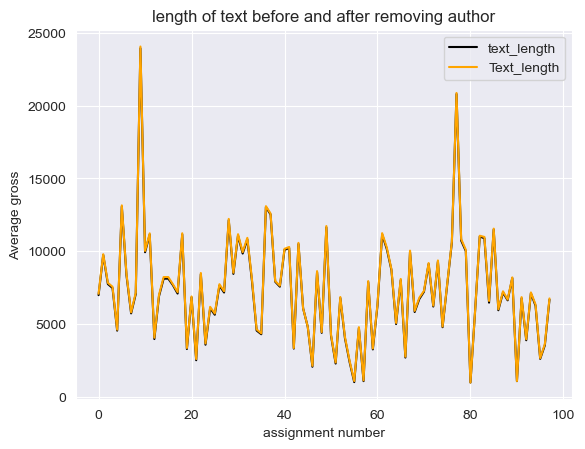

In [339]:
#graph to check if there are any anamolies while removing author info
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Plot the scatter plot
sns.lineplot(text_df['text_length'], color='black', label='text_length')
sns.lineplot(text_df['Text_length'], color='orange', label='Text_length')
plt.ylabel('Average gross')
plt.xlabel('assignment number')
plt.title('length of text before and after removing author')


In [340]:
x=text_df[text_df['URL_ID']=='blackassign0001']['text'].iloc[0]
print(x)

Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040.We have seen a huge development and dependence of people on technology in recent years. We have also seen the development of AI and ChatGPT in recent years. So it is a normal thing that we will become fully dependent on technology by 2040. Information technology will be a major power for all the developing nations. As a member of a developing nation, India is rapidly growing its IT base. It has also grown some IT cities which will be the major control centres for Information technology by 2040. Rising IT cities  Noida:- Noida in Uttar Pradesh near New Delhi is an emerging IT sector now. Many large companies like Google, Microsoft, IBM, Infosys and others have set up their companies here. Noida has a market base of billions of dollars and is doing a great job of boosting the national economy. The establishment of so many software companies has made Noida an information technology 

In [341]:
#removing Excess columns
text_df = text_df.drop(columns=['Text', 'Text_length'])

In [342]:
text_df

,URL_ID,URL,text,text_length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,6990
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,9745
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",7752
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,7479
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,4555
...,...,...,...,...
93,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,7117
94,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,6264
95,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,2617
96,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,How COVID-19 is impacting payment preferences?...,3545


# Text Analysis

In [362]:
#import for text analysis
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize,TextTilingTokenizer
nltk.download('punkt')
import string
import textstat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asuna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Note:for sentiment analysis the stopwords given in the file were used and for all other actions stopwords from NLTK library were used 

In [344]:
# Load stop words
stop_files=['StopWords_Auditor.txt','StopWords_Currencies.txt','StopWords_DatesandNumbers.txt','StopWords_Generic.txt','StopWords_GenericLong.txt','StopWords_Geographic.txt','StopWords_Names.txt']
stop_words_s=set()
for file in stop_files:
    stop_words_s.update(load_words_from_file(file))

# Load positive words
positive_words = load_words_from_file('positive-words.txt')

# Load negative words
negative_words = load_words_from_file('negative-words.txt')

In [345]:
#function for sentimental analysis

def seniment(text):
    #removing punctuatuins
    t=text.translate(str.maketrans('','',string.punctuation))
    tokens=word_tokenize(t)
    #removing stopwords
    tokens=[word for word in tokens if word.lower() not in stop_words_s]
    total_words_aftercleaning=len(tokens)
    positive_score=sum(1 for word in tokens if word in positive_words)
    negative_score=sum(1 for word in tokens if word in negative_words)
    polarity_score=(positive_score-negative_score)/((positive_score+negative_score)+0.000001)
    subjective_score=(positive_score+negative_score)/(total_words_aftercleaning+0.000001)
    return positive_score,negative_score,polarity_score,subjective_score

text_df[['positve_score','negative_score','polarity_score','subjective_score']]=text_df['text'].apply(seniment).apply(pd.Series)


In [346]:
from nltk.corpus import stopwords

In [347]:
#function for Average Sentence length

def average_sentence_length(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    sentences=sent_tokenize(text)
    total_sentences=len(sentences)
    total_words=len(word_tokenize(t))
    return total_words/total_sentences if total_sentences>0 else 0


text_df['average_sentence_length']=text_df['text'].apply(average_sentence_length)


In [348]:
#function for percentage of complex words and complex words

def percentage_complex(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words=word_tokenize(t)
    total_words=len(words)
    complex_words=[word for word in words if word.lower() not in stopwords.words('english') and len(word)>2]
    total_complex_words=len(complex_words)
    return 100*(total_complex_words/total_words),total_complex_words

text_df[['percentage_of_complexwords','total_complex_words']]=text_df['text'].apply(percentage_complex).apply(pd.Series)

In [349]:
#fog index

text_df['fog_index']=0.4*(text_df['average_sentence_length']+text_df['percentage_of_complexwords'])

In [350]:
#clean word count

def clean_words(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words=word_tokenize(t)
    clean_words=[word for word in words if word.lower() not in stopwords.words('english')]
    clean_words_count=len(clean_words)
    return clean_words_count

text_df['clean_word_count']=text_df['text'].apply(clean_words)

In [351]:
#function for syllable count 
def count_syllables(word):
    vowels = 'aeiouy'
    count = 0
    prev_char_was_vowel = False
    exceptions = ["es", "ed"]  # Exceptions to syllable counting
    
    for char in word:
        if char.lower() in vowels:
            if not prev_char_was_vowel:
                count += 1
                prev_char_was_vowel = True
        else:
            prev_char_was_vowel = False
    
    # Handle exceptions
    for exception in exceptions:
        if word.endswith(exception):
            count -= 1
    
    # Ensure at least one syllable for words with no vowels
    count = max(count, 1)
    
    return count

# Tokenize the text and count syllables for each word
def count_syllables_in_text(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    words = word_tokenize(t)
    syllable_counts = sum(count_syllables(word) for word in words)
    return syllable_counts


text_df['syllable_count']=text_df['text'].apply(count_syllables_in_text)

In [352]:
#function for personal pronouns

def personal_pronouns(text):
    pp=text.lower().count('i')+text.lower().count('me')+text.lower().count('my')+text.lower().count('we')+text.lower().count('us')+text.lower().count('our')
    return pp

text_df['personal_pronouns']=text_df['text'].apply(personal_pronouns)

In [353]:
#function for average word length

def avg_word_length(text):
    t=text.translate(str.maketrans('','',string.punctuation))
    avg_word_length=textstat.avg_letter_per_word(t)
    return avg_word_length

text_df['avg_word_length']=text_df['text'].apply(avg_word_length)

In [354]:
text_df.head(10)

,URL_ID,URL,text,text_length,positve_score,negative_score,polarity_score,subjective_score,average_sentence_length,percentage_of_complexwords,total_complex_words,fog_index,clean_word_count,syllable_count,personal_pronouns,avg_word_length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,6990,33.0,5.0,0.736842,0.068100,15.948052,51.710098,635.0,27.063260,642,1980,541,4.57
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,9745,56.0,31.0,0.287356,0.107673,18.924051,58.528428,875.0,30.980991,895,2834,814,5.48
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",7752,37.0,23.0,0.233333,0.096154,19.178571,62.104283,667.0,32.513142,675,2291,633,6.13
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,7479,35.0,71.0,-0.339623,0.172920,20.784314,62.924528,667.0,33.483537,675,2198,611,5.97
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,4555,21.0,8.0,0.448276,0.078378,18.105263,60.029070,413.0,31.253733,416,1258,352,5.53
5,blackassign0006,https://insights.blackcoffer.com/the-rise-of-t...,The rise of the OTT platform and its impact on...,13071,83.0,23.0,0.566038,0.096627,21.402299,61.009667,1136.0,32.964786,1170,3699,1044,5.95
6,blackassign0007,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cyber Crime and its EffectsCybercrime ...,8364,30.0,60.0,-0.333333,0.127479,17.493333,58.307927,765.0,30.320504,793,2447,688,5.31
7,blackassign0008,https://insights.blackcoffer.com/rise-of-inter...,Rise of Internet Demand and Its Impact on Comm...,5738,26.0,9.0,0.485714,0.072614,16.382979,62.597403,482.0,31.592153,507,1689,550,6.27
8,blackassign0009,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect by the Year ...,7067,35.0,49.0,-0.166667,0.140468,16.982143,66.246057,630.0,33.291280,647,2095,638,6.30
9,blackassign0010,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect by the Year ...,23932,135.0,173.0,-0.123377,0.172937,15.641350,53.115727,1969.0,27.502831,1997,7047,1989,5.38


In [355]:
final_df=text_df.copy()

In [356]:
#dropping columns to make it similar to given output data structure file
final_df=final_df.drop(columns=['text','text_length'])
final_df.head()

,URL_ID,URL,positve_score,negative_score,polarity_score,subjective_score,average_sentence_length,percentage_of_complexwords,total_complex_words,fog_index,clean_word_count,syllable_count,personal_pronouns,avg_word_length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,33.0,5.0,0.736842,0.068100,15.948052,51.710098,635.0,27.063260,642,1980,541,4.57
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,56.0,31.0,0.287356,0.107673,18.924051,58.528428,875.0,30.980991,895,2834,814,5.48
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,37.0,23.0,0.233333,0.096154,19.178571,62.104283,667.0,32.513142,675,2291,633,6.13
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,35.0,71.0,-0.339623,0.172920,20.784314,62.924528,667.0,33.483537,675,2198,611,5.97
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,21.0,8.0,0.448276,0.078378,18.105263,60.029070,413.0,31.253733,416,1258,352,5.53


In [357]:
#exporting the dataframe in Excel form
final_df.to_excel('output data structure.xlsx', index=False)

In [358]:
x

'Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040.We have seen a huge development and dependence of people on technology in recent years. We have also seen the development of AI and ChatGPT in recent years. So it is a normal thing that we will become fully dependent on technology by 2040. Information technology will be a major power for all the developing nations. As a member of a developing nation, India is rapidly growing its IT base. It has also grown some IT cities which will be the major control centres for Information technology by 2040. Rising IT cities  Noida:- Noida in Uttar Pradesh near New Delhi is an emerging IT sector now. Many large companies like Google, Microsoft, IBM, Infosys and others have set up their companies here. Noida has a market base of billions of dollars and is doing a great job of boosting the national economy. The establishment of so many software companies has made Noida an information technology

In [365]:
t=word_tokenize(x)
from nltk.text import Text

In [368]:
c=Text(t)

In [371]:
type(c)

nltk.text.Text

In [372]:
str(c)

'<Text: Rising IT cities and its impact on the...>'